<a href="https://colab.research.google.com/github/JonathaVaz/Project_Dados_Coracao_Analise_Visualizacao_Infos/blob/main/Dados_Coracao_para_Analise_Selecao_Visualizacao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [89]:
# Coleta de Dados sobre o Coração para Analise e Seleção das Melhores Informações para criação da Visualização e Modelos.
# Jonatha Rodrigues T. Vaz
# 24/04/2023
# Utilizando Processos Rápidos e Padrão.

In [76]:
# Import das Bibliotecas 

import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [77]:
# Carregando os Dados no Objeto Pandas

data = pd.read_csv("heart.csv")

In [78]:
# Exibindo as 11 primeiras linhas

data.head(11)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [79]:
# Exibindo as 11 ultimas linhas

data.tail(11)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
292,58,0,0,170,225,1,0,146,1,2.8,1,2,1,0
293,67,1,2,152,212,0,0,150,0,0.8,1,0,3,0
294,44,1,0,120,169,0,1,144,1,2.8,0,0,1,0
295,63,1,0,140,187,0,0,144,1,4.0,2,2,3,0
296,63,0,0,124,197,0,1,136,1,0.0,1,0,2,0
297,59,1,0,164,176,1,0,90,0,1.0,1,2,1,0
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [80]:
# Separando os Dados em Features (Colunas) de Seleção e de Classificação

X = data.iloc[:,0:20]  #independent columns
y = data.iloc[:,-1]    #target column i.e price range
#apply SelectKBest class to extract top 10 best features

In [81]:
# Selecionando as 14 Melhores Colunas 
bestfeatures = SelectKBest(score_func=chi2, k=14)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

In [82]:
# Exibindo o resultado da Classificação
 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)

featureScores.columns = ['Specs','Score']  #naming the dataframe columns

print(featureScores.nlargest(14,'Score'))  #print 14 best features

       Specs       Score
7    thalach  188.320472
13    target  138.000000
9    oldpeak   72.644253
11        ca   66.440765
2         cp   62.598098
8      exang   38.914377
4       chol   23.936394
0        age   23.286624
3   trestbps   14.823925
10     slope    9.804095
1        sex    7.576835
12      thal    5.791853
6    restecg    2.978271
5        fbs    0.202934


In [83]:
# Import das Bibliotecas de Ciencias de Dados

import pandas as pd
import numpy as np

# Carregando os Dados da planilha para do DATAFrame chamdo data

data = pd.read_csv("heart.csv")

# Selecionado / separando as features de seleção x features de classificação

X = data.iloc[:,0:20]  #independent columns
y = data.iloc[:,-1]    #target column i.e price range

# Importando Bibliotecas de Gráfico para Visualizar as melhores Features

from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt

model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_)

[0.01145368 0.02612089 0.04990074 0.01053271 0.00930768 0.00412466
 0.00841828 0.02163486 0.07320172 0.02749583 0.02901685 0.04080663
 0.04686306 0.6411224 ]


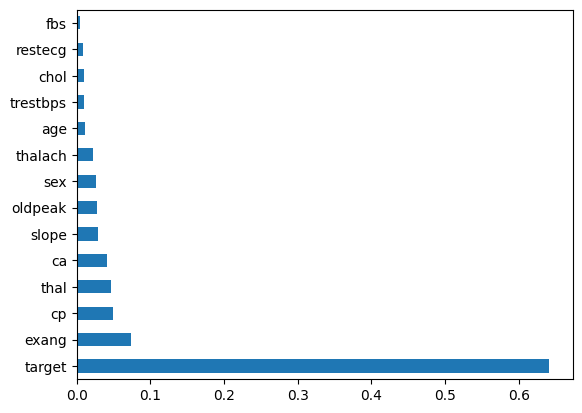

In [84]:
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(14).plot(kind='barh')
plt.show()

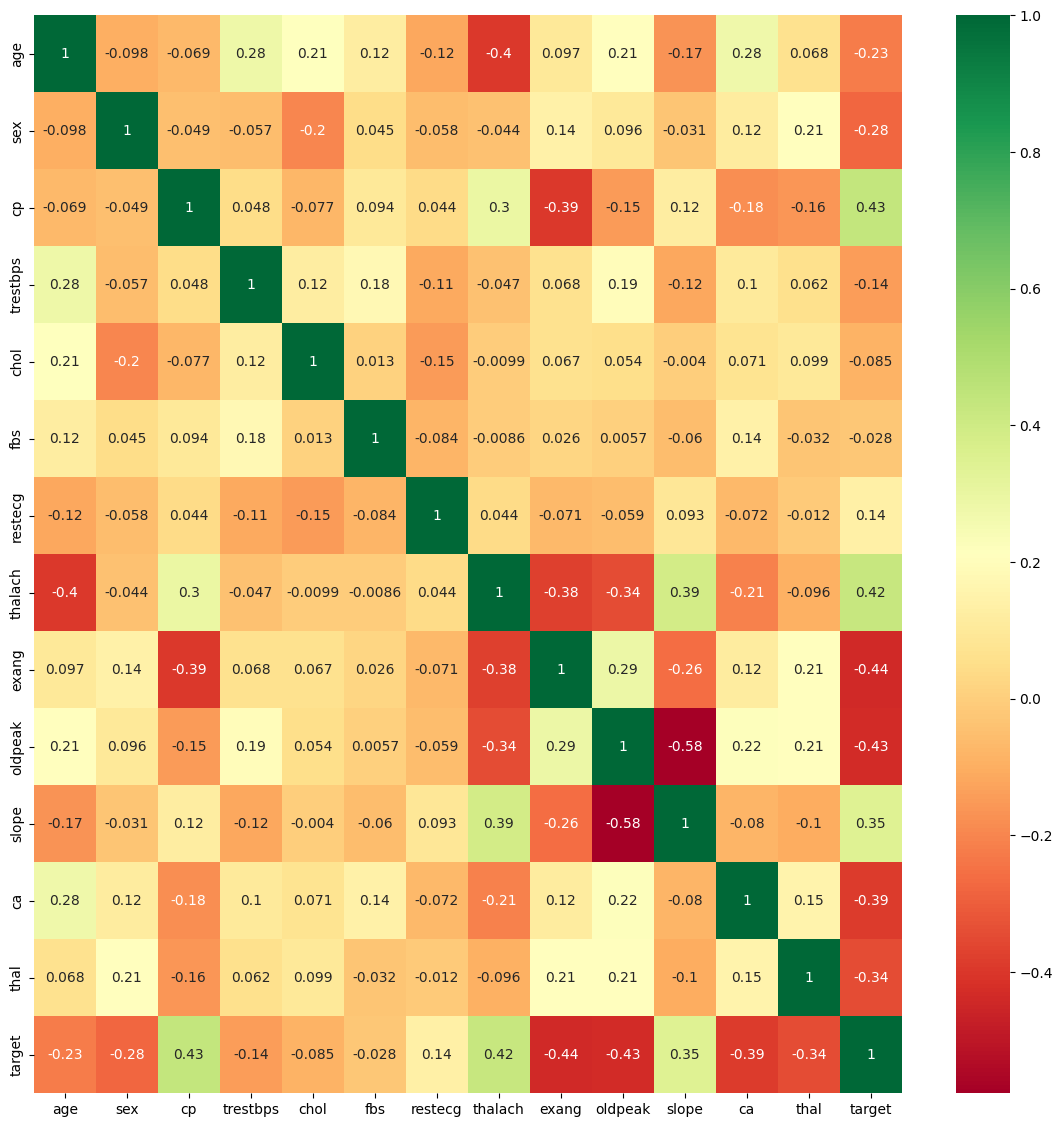

In [85]:
import pandas as pd
import numpy as np
import seaborn as sns

#import matplotlib as plt para visualizar

import matplotlib.pyplot as plt

data = pd.read_csv("heart.csv")
X = data.iloc[:,0:20]  #independent columns
y = data.iloc[:,-1]    #target column i.e price range

#get correlations of each features in dataset

corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(14,14))

#plot heat map
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [86]:
# Criando os campos Descritivos (Labels) mais Importantes

labels = ["cp","ca","exang","target"]

In [87]:
# Criando os valores dos campos (Metricas do Grafico)
valores = [24, 20, 29, 145]

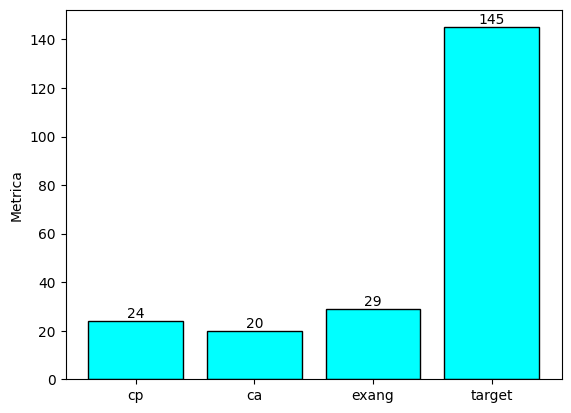

In [88]:
# Visualizando o Grafico com o objeto plt (Matplotlib)
plt.bar(labels,valores,color='cyan', edgecolor='black')
plt.xlabel('')
plt.ylabel('Metrica')

for x,y in zip(labels,valores):
  plt.text(x, y+0.05, '%d' % y, ha='center' , va= 'bottom')